<a href="https://colab.research.google.com/github/9bishal/Learning-Tensorflow/blob/main/neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction to the Regression with Neural Networks in TensorFlow
There are many definations for a regression problem but in pur cases, we're going to simplfy it: predicting a numerical variables based on some other cobination of variable, even shorter.....predicting a number

In [64]:
import tensorflow as tf
print(tf.__version__)

2.18.0


##Creating some data to view and fit

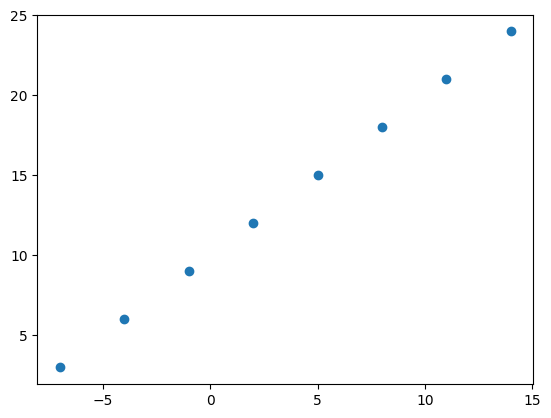

In [45]:
import numpy as np
import matplotlib.pyplot as plt
#creating features
x=np.array([-7.0,-4.0,-1.0,2.0,5.0, 8.0, 11.0, 14.0])
#creating labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
#visulaize it
plt.scatter(x,y)


In [46]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and Output Shapes

In [47]:
# create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([9397000])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([9397000], dtype=int32)>)

In [48]:
input_shape=x.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [49]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [50]:
input_shape=x[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

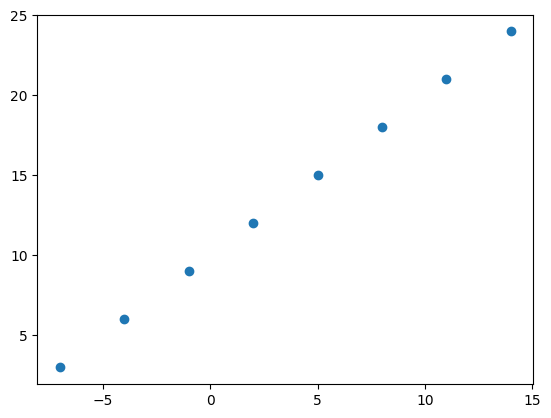

In [51]:
plt.scatter(x,y)

In [54]:
x=tf.cast(tf.constant(x),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

##Steps in Modeling TensorFlow
1.**Creating a Model**: define the input & ouput layers, as well as the hidden layres of a deep learning model.

2.**Compiling a model**: define the loss function(in other words, the function which tells our model how wrong it is)and the optimizer( tells our model how to improve the patterns its learning) and evaluation metrics
(What we can use to interpret the performance of our model).

3.**Fitting a model**: letting the model try to find patterns between x & y(features and labels)

In [52]:
#set ramdom seed
tf.random.set_seed(42)

#1.Create  a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 771ms/step - loss: 12.1567 - mae: 12.1567
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 12.0242 - mae: 12.0242
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 11.8917 - mae: 11.8917
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 11.7592 - mae: 11.7592
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 11.6267 - mae: 11.6267


In [60]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[9.549449]], dtype=float32)

##Improving Model
We can inprove the model by altering the steps we took to create a mode.

1.**Creating a mode**: here we might add more layres, increaes the number of hidden unite(all called neurons) within each of the hidden layers, change the activation function of each layer

2.**Compiling a model**:Here we might change the optimizatioin function or perhaps the learning rate of optimization functon.

3**Fitting**: here we might fit the model for more epochs(leave it training for longer) or on more data(given the model more examples to learn from)

###Using SSD()

In [74]:
#let us build a model to improve

#1.Create a Model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2.Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3.Fit a model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step - loss: 14.5219 - mae: 14.5219
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 14.1285 - mae: 14.1285
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 13.7833 - mae: 13.7833
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 13.4706 - mae: 13.4706
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 13.1924 - mae: 13.1924
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.9090 - mae: 12.9090
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.6365 - mae: 12.6365
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.3542 - mae: 12.3542
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 12.0405 - mae: 12.0405
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 11.6843 - mae: 11.6843
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 11.2733 - mae: 11.2733
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.7831 - mae: 10.7831
Epoch 13/100
1/1 ━━━━━━━

In [75]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[29.700703]], dtype=float32)

###Using Adam(Adam(learning_rate=0.0001)

In [80]:
#let us build a model to improve

#1.Create a Model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2.Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=["mae"])
#3.Fit a model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 13.4194 - mae: 13.4194
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 13.3940 - mae: 13.3940
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 13.3688 - mae: 13.3688
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 13.3429 - mae: 13.3429
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.3170 - mae: 13.3170
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 13.2925 - mae: 13.2925
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 13.2703 - mae: 13.2703
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 13.2489 - mae: 13.2489
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 13.2290 - mae: 13.2290
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 13.2092 - mae: 13.2092
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 13.1888 - mae: 13.1888
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 13.1677 - mae: 13.1677
Epoch 13/100
1/1 ━━━━━━━━━━

In [81]:
#try and make a prediction using our model
y_pred = model.predict(tf.constant([[17.0]]))
y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


array([[24.413616]], dtype=float32)